# MLlib(KMeans)でクラスタリング


In [4]:
#kmeans sample code .  if you know more info , please see url.
#http://qiita.com/kenmatsu4/items/00ad151e857d546a97c3

In [11]:
%matplotlib inline
import os, sys
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

plt.style.use('ggplot')


## scikit-learnのirisデータを取得。

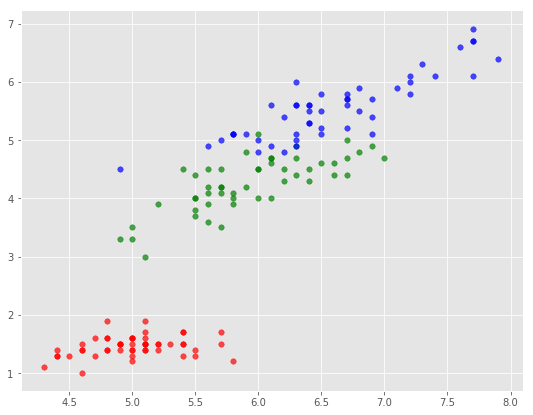

In [12]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()
plt.figure(figsize=(9,7))

for i, color in enumerate('rgb'):
    idx = np.where(iris.target == i)[0]
    plt.scatter(iris.data[idx,0],iris.data[idx,2], c=color, s=30, alpha=.7)

plt.show()

百合のデータを散布図にプロット。

In [13]:
# http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#module-pyspark.mllib.clustering

from pyspark.mllib.clustering import KMeans

k = 3
d_start = dt.now()

## Sparkが読み取れるようにデータを変換

In [14]:
data = sc.parallelize(iris.data[:,[0,2]])

## KMeansで学習実行

In [15]:
model = KMeans.train(data, k, initializationMode="random", seed=None)


## 結果表示

Final centers: [array([ 6.83902439,  5.67804878]), array([ 5.87413793,  4.39310345]), array([ 5.00784314,  1.49411765])]
Total Cost: 53.8013511931
21:11:40: [end] 0:01:20.067209


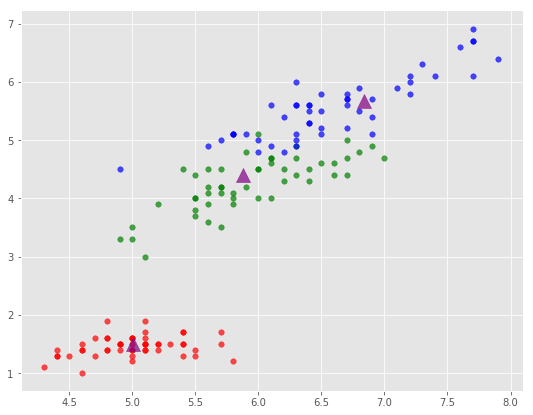

In [17]:
print("Final centers: " + str(model.clusterCenters))
print("Total Cost: " + str(model.computeCost(data)))
diff = dt.now() - d_start
print("{}: [end] {}".format(dt.now().strftime('%H:%M:%S'), diff ))

# ---------- Draw Graph ---------- # 
plt.figure(figsize=(9,7))
for i, color in enumerate('rgb'):
    idx = np.where(iris.target == i)[0]
    plt.scatter(iris.data[idx,0],iris.data[idx,2], c=color, s=30, alpha=.7)

for i in range(k):
    plt.scatter(model.clusterCenters[i][0], model.clusterCenters[i][1], s=200, c="purple", alpha=.7, marker="^")

plt.show()
